Warning message in par(new = TRUE):
"플랏없이 par(new=TRUE)를 호출합니다"

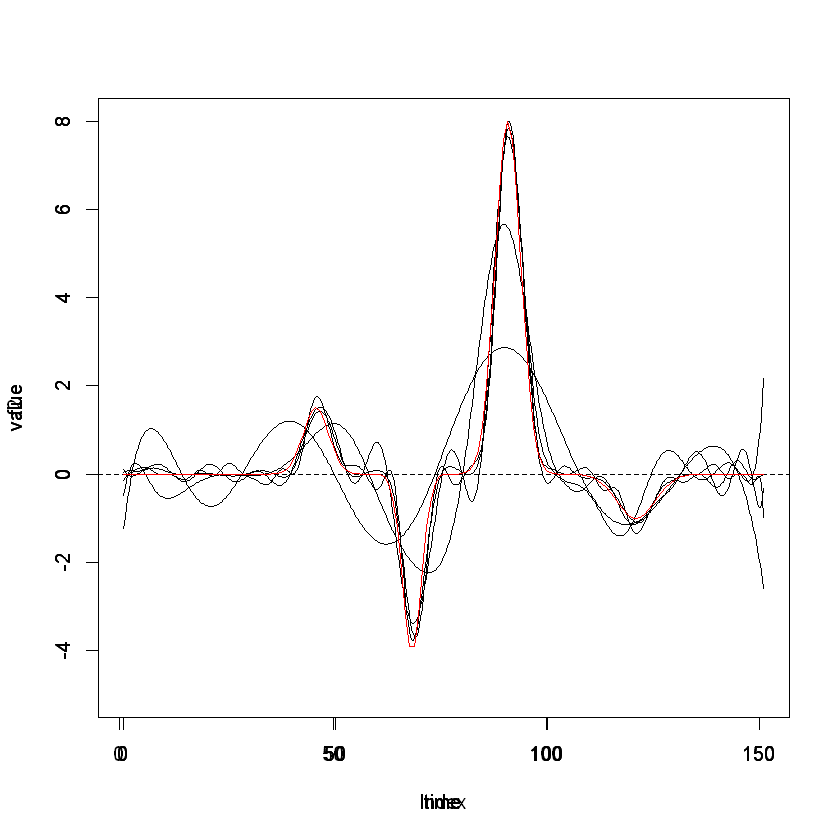

In [2]:
rm(list=ls())

library('fda');

# set up "global" variables
set.seed(100)
n_obs = 60
n_var = 150 #number of vars
test = seq(1,20,1)
grid = seq(0, 1, length = n_var+1)
beta1 = sin(grid * 5 * pi)
beta2 = -dnorm(grid, mean=.2, sd=.03) +3*dnorm(grid, mean=.5,
                                               sd=.04)+dnorm(grid, mean=.75, sd=.05)
nharm = 4 #number of fpc

f1 <- 2*sin(0.5*pi*grid) + 4*sin(1.5*pi*grid) + 5*sin(2.5*pi*grid)

f2 <- 1.5*exp(-0.5*(grid-0.3)^2/0.02^2) -
  4*exp(-0.5*(grid-0.45)^2/0.015^2) +
  8*exp(-0.5*(grid-0.6)^2/0.02^2) -
  exp(-0.5*(grid-0.8)^2/0.03^2)


data_generation <-function(){
  var1 = 1
  var2 = 5
  var3 = 0.2
  
  X <- matrix(0, nrow=n_obs, ncol=length(grid))
  for(i2 in 1:n_obs){
    X[i2,]=X[i2,]+rnorm(length(grid), 0, var1)
    X[i2,]=X[i2,]+runif(1, 0, var2)
    X[i2,]=X[i2,]+rnorm(1, 0, var3)*grid
    
    for(j2 in 1:10){
      e =rnorm(2, 0, var1/j2^(2))
      X[i2,]=X[i2,]+e[1]*sin((2*pi)*grid*j2)
      X[i2,]=X[i2,]+e[2]*cos((2*pi)*grid*j2)
    }
    
  }
  return(X)
} 

beta_container1 <- list()
beta_container2 <- list()

for(i in c(10,20,30,40,50)){
  X = data_generation()
  Y1 = X %*% f1 + rnorm(n_obs, 0, 0.125)
  Y2 = X %*% f2 + rnorm(n_obs, 0, 0.125)
  
  Y1 = as.numeric(Y1)
  Y2 = as.numeric(Y2)
  
  final_X = t(X)
  
  smallbasis  <- create.bspline.basis(rangeval = c(0, length(grid)), nbasis = i, 5)
  
  smooth_basis <- smooth.basis(y = final_X, fdParobj=smallbasis)
  smooth_basis_fd = smooth_basis$fd
  
  f_regress1 <- fRegress(Y1 ~ smooth_basis_fd)
  f_regress2 <- fRegress(Y2 ~ smooth_basis_fd)
  
  beta_container1[[i]] <- f_regress1$betaestlist[[2]]
  beta_container2[[i]] <- f_regress2$betaestlist[[2]]
}

for(i in c(10,20,30,40,50)){
  if(i>1){
    par(new=TRUE)
  }
  plot(beta_container2[[i]], ylim=c(-5,8))
}
par(new=TRUE)
plot(f2, type = 'l', col = 'red', ylim=c(-5,8))

